# AI for NLP. Lecture 1 Part 1

## Build Graph

In [5]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### Get data from source using regular expression
### 使用正则表达式从源获取数据

## regular expression
[a-z]
[A-Z]
[^a]: negation
colou?r:  ? zero or one of its previous character
* : zero or more of its previous character
+: one or more
.:match any single character
^:start of the line
$:end of the line
| [cat|dog] : cat or dog
(da): make the string da like a character

In [1]:
import re

In [2]:
l = "color or colour"

In [3]:
pattern = re.compile('colou?r')
pattern.findall(l)

['color', 'colour']

In [25]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [26]:
city_info = get_city_info(coordination_source) 

In [27]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

### Compute distance between cities
### 计算城市之间的距离

In [28]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [29]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance("杭州","上海")

153.5185697155768

### Draw the graph
### 画出图

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [35]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [36]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

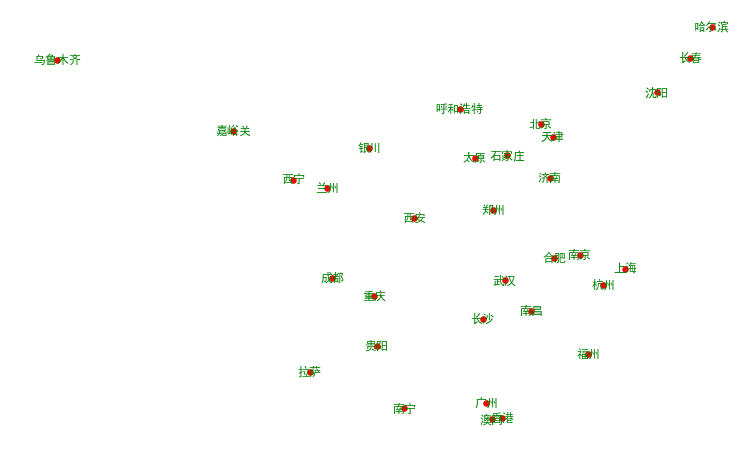

In [69]:
plt.figure(figsize=(10,6)) #创建一幅图
nx.draw(city_graph, city_info, with_labels=True, node_size=30, node_color='r',font_color='g')

### Build connection between. Let's assume that two cities are connected if their distance is less than 700 km.
### 建立联系。假设两个城市之间的距离小于700公里。

In [166]:
threshold = 800   # defined the threshold 定义的阈值

In [167]:

from collections import defaultdict

In [168]:
# 构建后继节点连接图，这里我们定义一个规则，距离在700以内的是可以相互连接的
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:#判断距离，如果距离小于700那么就是连接的，可以添加到后继节点网络
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)

In [169]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
              '香港',
              '澳门'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '西安', '重庆', '南宁', '银川'],
             '贵阳': ['兰州',
              '西宁',
              '成都',
              '拉萨',
              '广州',
              '长沙',
              '太原',
              '西安',
              '重庆',
              '呼和浩特',
              '南宁',
              '银川',
              '澳门'],
             '武汉': ['石家庄',
              '郑州'

In [170]:
cities_connection_graph = nx.Graph(cities_connection)

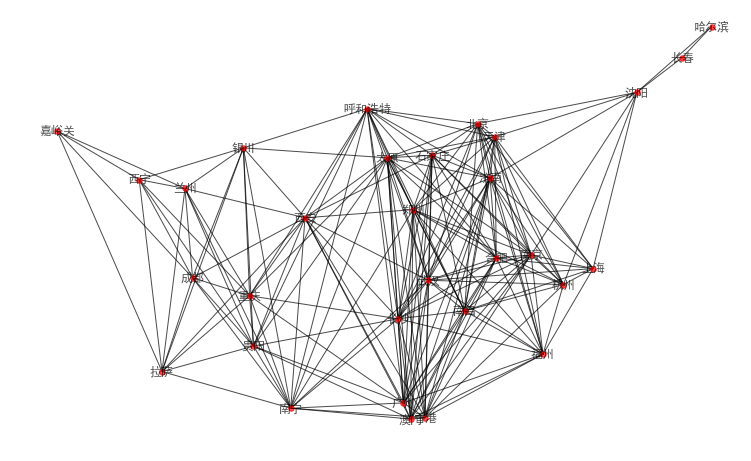

In [171]:
plt.figure(figsize=(10,6))
nx.draw(cities_connection_graph,
        city_info,
        with_labels=True,
        node_size=30,
        node_color='r',
        font_color='black',
       alpha=0.7)

### BFS 1 version   广度优先搜索

In [157]:
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [172]:
search_1(cities_connection,"上海","香港")

['上海', '武汉', '香港']

### Optimal search using variation of BFS 利用BFS变量进行最优搜索

In [73]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return path# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  
        

In [74]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [75]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [76]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [77]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

In [80]:
get_distance_of_path(["北京","天津","广州"])

963.5971457781096

In [78]:
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [79]:
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

In [120]:
from emoji import emojize

In [123]:
def pretty_print(cities):
    return(emojize(" :airplane_departure:-> ").join(cities)+ emojize(":airplane_arrival:"))

In [124]:
pretty_print(search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance))

'北京 🛫-> 天津 🛫-> 上海🛬'

In [173]:
pretty_print(search_2(cities_connection,"北京","广州",search_strategy=sort_by_distance))

'北京 🛫-> 武汉 🛫-> 广州🛬'

# AI for NLP Lecture 1 Part 2
## Machine Learning


In [102]:
from sklearn.datasets import load_boston
import random

In [103]:
dataset = load_boston()
x,y=dataset['data'],dataset['target']

In [104]:
x.shape

(506, 13)

In [105]:
y.shape

(506,)

In [106]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [107]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [108]:
X_rm = x[:,5]

In [109]:
X_rm

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

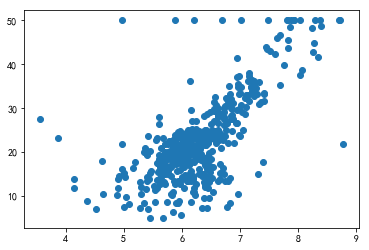

In [110]:
# plot the RM with respect to y
plt.scatter(X_rm,y)

### Gradient descent
### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [111]:
#define target function
def price(rm, k, b):
    return k * rm + b

### Define mean square loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [112]:
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

### Define partial derivatives

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [113]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient


In [174]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 2000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 206014.949729844, parameters k is -62.62658834306496 and b is -34.92125993323296
Iteration 1, the loss is 173637.99225749934, parameters k is -56.88667367143906 and b is -34.019181379391576
Iteration 2, the loss is 146350.45442638363, parameters k is -51.617168089558575 and b is -33.1910535129094
Iteration 3, the loss is 123352.3168905932, parameters k is -46.7795194077899 and b is -32.43081573412864
Iteration 4, the loss is 103969.31746298479, parameters k is -42.33833496585595 and b is -31.732904137424192
Iteration 5, the loss is 87633.18301449111, parameters k is -38.26112269486536 and b is -31.092210804841848
Iteration 6, the loss is 73864.9687735118, parameters k is -34.51805340049997 and b is -30.50404643581027
Iteration 7, the loss is 62261.016564936865, parameters k is -31.081742528189118 and b is -29.964106039519976
Iteration 8, the loss is 52481.12031074918, parameters k is -27.927049813632102 and b is -29.468437438969772
Iteration 9, the loss is 4423

Iteration 458, the loss is 44.99582996502304, parameters k is 7.429177175166255 and b is -24.028904136236456
Iteration 459, the loss is 44.99576286068881, parameters k is 7.429217404536073 and b is -24.02916004000532
Iteration 460, the loss is 44.99569575958178, parameters k is 7.429257632938485 and b is -24.029415937620406
Iteration 461, the loss is 44.995628661701964, parameters k is 7.4292978603735165 and b is -24.029671829081867
Iteration 462, the loss is 44.99556156704915, parameters k is 7.42933808684119 and b is -24.029927714389846
Iteration 463, the loss is 44.995494475623225, parameters k is 7.429378312341528 and b is -24.030183593544493
Iteration 464, the loss is 44.99542738742392, parameters k is 7.429418536874554 and b is -24.030439466545957
Iteration 465, the loss is 44.99536030245119, parameters k is 7.4294587604402915 and b is -24.030695333394384
Iteration 466, the loss is 44.995293220704816, parameters k is 7.429498983038764 and b is -24.030951194089923
Iteration 467, t

Iteration 753, the loss is 44.976173483523034, parameters k is 7.441002986109985 and b is -24.104129515209674
Iteration 754, the loss is 44.97610732454511, parameters k is 7.441042931101849 and b is -24.10438361001682
Iteration 755, the loss is 44.97604116874901, parameters k is 7.441082875133148 and b is -24.104637698713695
Iteration 756, the loss is 44.97597501613465, parameters k is 7.441122818203903 and b is -24.104891781300438
Iteration 757, the loss is 44.97590886670182, parameters k is 7.441162760314138 and b is -24.1051458577772
Iteration 758, the loss is 44.975842720450345, parameters k is 7.441202701463877 and b is -24.105399928144127
Iteration 759, the loss is 44.97577657738007, parameters k is 7.441242641653141 and b is -24.10565399240137
Iteration 760, the loss is 44.97571043749088, parameters k is 7.441282580881955 and b is -24.10590805054907
Iteration 761, the loss is 44.97564430078271, parameters k is 7.441322519150341 and b is -24.106162102587373
Iteration 762, the los

Iteration 1107, the loss is 44.95295089284581, parameters k is 7.455083665073656 and b is -24.193698375753996
Iteration 1108, the loss is 44.95288585073228, parameters k is 7.455123271464246 and b is -24.193950316678478
Iteration 1109, the loss is 44.95282081174688, parameters k is 7.4551628769024125 and b is -24.194202251544482
Iteration 1110, the loss is 44.95275577588941, parameters k is 7.455202481388178 and b is -24.19445418035215
Iteration 1111, the loss is 44.95269074315978, parameters k is 7.455242084921566 and b is -24.19470610310163
Iteration 1112, the loss is 44.95262571355784, parameters k is 7.455281687502598 and b is -24.194958019793066
Iteration 1113, the loss is 44.952560687083405, parameters k is 7.455321289131298 and b is -24.195209930426604
Iteration 1114, the loss is 44.95249566373633, parameters k is 7.4553608898076895 and b is -24.19546183500239
Iteration 1115, the loss is 44.95243064351653, parameters k is 7.455400489531794 and b is -24.19571373352057
Iteration 1

Iteration 1461, the loss is 44.93012033488587, parameters k is 7.46904498650043 and b is -24.282507988920784
Iteration 1462, the loss is 44.93005639078231, parameters k is 7.469084257159964 and b is -24.282757794220398
Iteration 1463, the loss is 44.9299924497541, parameters k is 7.469123526875148 and b is -24.283007593512888
Iteration 1464, the loss is 44.92992851180098, parameters k is 7.469162795646003 and b is -24.283257386798397
Iteration 1465, the loss is 44.929864576922945, parameters k is 7.4692020634725536 and b is -24.28350717407707
Iteration 1466, the loss is 44.92980064511984, parameters k is 7.469241330354822 and b is -24.28375695534905
Iteration 1467, the loss is 44.92973671639134, parameters k is 7.469280596292831 and b is -24.284006730614486
Iteration 1468, the loss is 44.92967279073744, parameters k is 7.4693198612866025 and b is -24.284256499873518
Iteration 1469, the loss is 44.929608868157985, parameters k is 7.46935912533616 and b is -24.284506263126293
Iteration 1

Iteration 1780, the loss is 44.90987735944626, parameters k is 7.481524549971627 and b is -24.361891964870352
Iteration 1781, the loss is 44.90981438890578, parameters k is 7.481563520532273 and b is -24.362139861205527
Iteration 1782, the loss is 44.90975142139376, parameters k is 7.481602490155785 and b is -24.362387751579483
Iteration 1783, the loss is 44.9096884569102, parameters k is 7.481641458842186 and b is -24.362635635992362
Iteration 1784, the loss is 44.909625495454776, parameters k is 7.481680426591498 and b is -24.36288351444431
Iteration 1785, the loss is 44.90956253702748, parameters k is 7.481719393403744 and b is -24.363131386935468
Iteration 1786, the loss is 44.90949958162803, parameters k is 7.481758359278946 and b is -24.36337925346598
Iteration 1787, the loss is 44.90943662925646, parameters k is 7.481797324217127 and b is -24.36362711403599
Iteration 1788, the loss is 44.90937367991241, parameters k is 7.481836288218309 and b is -24.36387496864564
Iteration 1789

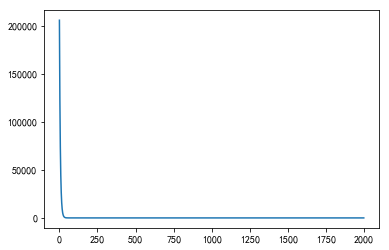

In [175]:
plt.plot(list(range(iteration_num)),losses)

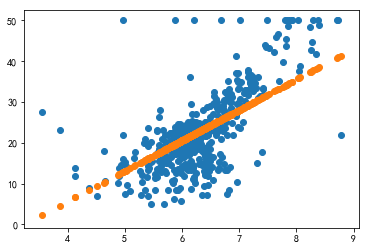

In [176]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)